# Git
* 협업 툴.
* 서버와의 통신이 없이 대부분이 로컬에서 일어나서 더 속도가 빠름
  * SVN(subversion)의 경우 여러 개발자들의 중앙의 서버를 이용해서 작업하기 때문에 항상 네트워크를 필요.
  * GIt은 작업은 로컬에서 일어나, 코드를 공유할 때만 네트워크를 사용하기 때문에 속도가 더 좋다.
* 분산 작업에 매우 효율
  * 사용자들이 복사된 프로젝트에서 각자 작업을 할 수 있음.
  * 각 사용자들이 단절되어도 상관이 없음
  * 하지만, 소스코드를 병합하는 과정이 변거롭기 때문에 보통 통합 관리자를 두어 연활을 분담.
* 데이터의 무결성을 보장
  * 모든 파일은 기본적으로 체크섬이라는 검사과정을 거치게된다. 
    * 체크섬은 16-bit의 문자로 되어 있으며 이를 commiit ID라 부른다.
    * commit id가 같으면 파일과 구성이 완벽히 동일하다는 의미로
    * 누가 무엇을 작업했는지 기록이 남는다.
* 준비 영역
  * Staging area가 존재
  * git add를 하게 되면 Staging area에서 점검이 가능
  * 그리고 commit을 함.(저장소(repository)에 영향)
* 오픈 소스
  * 코드를 누구나 볼 수 있음

* git 호스팅 서비스
  * github
  * gitlab
  * bit bucket 등이 존재.

## 설치 방법
* 보통 Linux와 macOS에서는 git이 설치
* Window에서는 설치가 필요.
* git homepage에서 다운 [링크](https://git-scm.com/)
  * 설치 확인
  * `$git --version`
    * 본인이 설정한 버전과 맞는 지 확인.

* 사용자 정보 설정
  * repository에 코드를 반영할 때 등록될 사용자 정보를 설정합니다.

In [ ]:
!git config --global user.name  ['git 닉네임']
!git config --global user.emial ['git 이메일 주소']

* 설정 정보 확인
  * 앞서 설정한 사용자 정보 확인

In [ ]:
!git config --list

filter.lfs.smudge=git-lfs smudge -- %f
filter.lfs.process=git-lfs filter-process
filter.lfs.required=true
filter.lfs.clean=git-lfs clean -- %f


## 저장소 생성
* git init()
  * .git이라는 폴더가 새로 생성.
* git add 
  * git 파일 생성
  * git 저장소에 등록(staging area로 보내버림)
 
 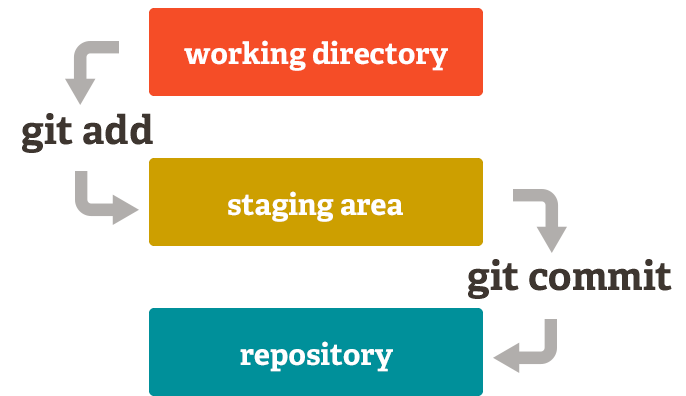

## Staging 상태 확인
* git status를 통해 git의 상태를 확인 할 수 있다.
  * 준비 영역에 있는 파일들의 상태 확인

## Git 저장소에 반영
* Staging area에 있는 모든 파일들을 repository에 반영한다.
* 어떤 내용을 했는지 내용도 적어준다.
* 오타가 있으면 `git commit --amend`를 이용해서 수정한다.
  * commit 메시지를 바꿀 수 있다.

## 저장소 반영 내역
* git log
  * 모든 commit들의 history를 확인.
    * 저장소의 반영 내역을 확인할 수 있다.
  * commit id
  * commit message
  * 누가, 언제 했는지 알 수 있음.
  * 각종 옵션들
    * `git log  -p -2`
      * -p : 각 commit의 수정 결과를 보여주는 diff와 같은 역활
      * -n : 상위 n개의 commit만 보여줌.
    * `git log --stat`
      * --stat : 어떤 파일이 commit에서 수정되고 변경되었는지, 파일 내 라인이 추가되거나 삭제되었는지 확인.
    * `git log --pretty=oneline`
      * --pretty=oneline : 각 commit을 한 줄로 출력
    * `git log --graph`
      * --graph : commit간의 연결된 관계를 아스키 그래프로 출력해서 branch를 사용시 매우 중요하게 사용한다.
    * git log -S function_name
      * -S: 코드에서 추가되거나 제거된 내용 중 특정 텍스트(위에서는 fucntion_name)이 포함되어 있는지 검사.

* git history를 통해 볼 수 있는 것들(git log 활용)
  * commit size 
  * file Tree
  * 어떤 사람이 했는지 
  * 어떤 메시지 인지 알 수 있음.


## git의 가지치기
* 여러 작업을 독립적으로 진행.
  * 각각의 branch는 다른 branch에 영향 받지 않음.
* `git branch`
  * 현재의 Branch 확인.
  * 생성은 `git branch <branch 명>`으로 할 수 있다.(다른 방법도 존재)
  * 메인 Branch
    * 배포할 수 있는 수준의 안정적인 Branch
  * 토픽 Branch
    * 기능 추가나 버그 수정과 같은 단위 작업을 위한 Branch
    * 수시로 추가 및 사라짐.
* `git checkout`
  * branch 전환을 할 수 있음.
    * `git checkout <Branach name>`
  * git log로 확인이 가능한 snapshot을 전환할 수 있음.
    * `git checkout <snapshot hash>`
    * 과거의 파일 내용확인.
  

## git의 Merge
* branch는 독립적인 구조이므로 이를 병합하기 위해서는 다양한 방법이 필요하다.
* 합치는 것을 시도할 branch는 main(master)이다.
* `git merge <합칠 branch>`
* fast-forward
  * 기존 메인보다 새로운 내용만 추가되서 합쳐지면 fast-forward이다.
  * 하지만, 보통 여러작업을 독립적으로 작업하기 때문에 항상 위와 같이 되지는 않는다.
    * Merge conflict이 발생
  * 이때 확인을 위해 `git log --graph --all`을 통해서 확인할 수 있다.
  * 합침 branch는 `git branch -d <bracnh name>`을 이용해 사용이 완료된 branch는 제거한다.

## Merge conflict
* Merge한 두 Branch에서 같은 파일을 변경했을 때 충돌이 발생.
  * 둘다 다른 내용을 가지게 되면, merge시 충돌이 발생
* conflict 알림을 통해서 사용자에게 어떤것을 사용할지 알린다.
  * git status 명령어로 어느 파일에서 충돌이 발생했는지 확인이 가능.  

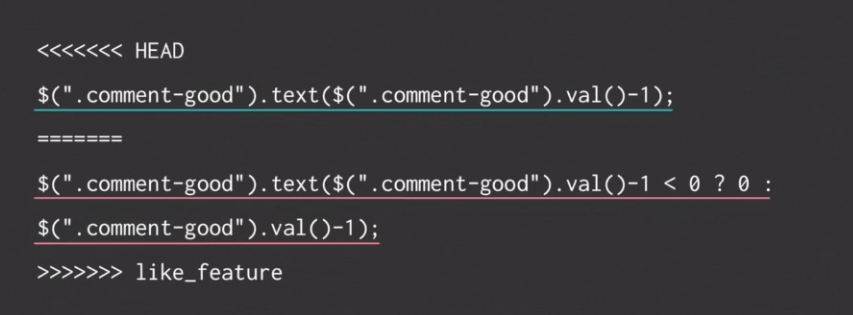


* 위와 같이 충돌 난것을 확인할 수 있음. 
  * HEAD에서는 위와같이 파일이 존재
  * 다른 Branch에서는 아래와 같이 파일이 존재한다.
  * 어떻게 사용할지를 사용자가 직접 수정해야한다.
  * 'git'에서 사용된 <, =, >는 제거해야한다.
  * 수정 후 `git add`와 `git commit` 과정 후 다시 merge해야한다.

## 충돌 방지
* Master Branch의 변화를 지속적으로 가져오기
* Master Branch의 변화가 잘 없도록 하기

## Git 원격 저장소.
* GIthub와 같은 git에대한 hosting 사이트
* `git clone`을 이용해 기존의 repository를 복사.
* `git remote add`을 이용해서 연결 가능
  * `git remote add origin https://<웹 호스트 서비스><그룹 명><프로젝트 명>`
  * `git remote add origin https://gitlab.com/group/project`
* 원격 저장소 확인
  * `git remote`
  * `git remote show origin`을 이용해 어떤 원격저장소가 있는지 확인할 수 있다.

* 원격 저장소 삭제
  * 주소가 변경되거나, 필요 없어진 저장소는 삭제가 가능
    * `git remote rm git_test(삭제할 이름)`

## Git 원격 저장소 갱신
* pull
  * 원격 저장소에서 데이터 가져오기 + 병합(Merge)
  * `git pull` : 원격 저장소에서 데이터를 가져와 로컬 데이터와 병합(`git log`를 통해 확인할 수 있음)

* Fetch
  * 원격 저장소에서 데이터 가져오기(병합은 별도)
  * `git fetch`를 통해 데이터를 가져오기 git log을 통해 변경된 파일 확인 후 Merge

* push
  * 로컬 저장소에서 작업한 내용을 원격 저장소에 반영.
  * 다른 사람이 먼저 push한 상태에서는 push를 할 수 없음.
  * 다른 사람이 작업한 것을 Merge 후 push 가능.
  * `git push [branch]`

* 요약  

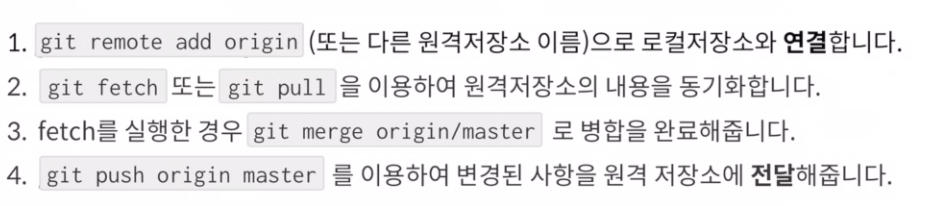


## orign이란
위에서 원격저장소와 연결하기 위해서 add origin을 사용했는데 이는 원격저장소의 단축이름을 __origin__으로 지정하겠다는 의미이다.
* 다른이름으로 저장가능.
* 기본적 origin이 default라서 clone으로 사용하면 origin으로 통일
* `-v`옵션을 통해서 저장소의 이름과 주소를 함께 볼 수 있다.
  * `git remote -v`
  